#Assignment 4 - ResNet

Group Members:
1. Anjali Katherine John (Matrikel Nr: 236561)
2. Ashly Mathew (Matrikel Nr: 241491)
3. Minu Genty (Matrikel Nr: 241252)

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, Add, MaxPool2D,GlobalAveragePooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

#CIFAR-10

[2]


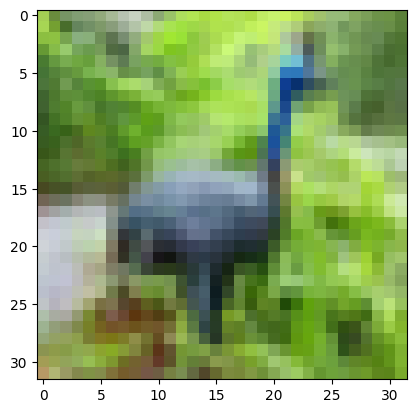

In [4]:
cifar = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar.load_data()

print(train_labels[6])
plt.imshow(train_images[6], cmap="Greys_r")

In [3]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [19]:
train_data = tf.data.Dataset.from_tensor_slices(
    (train_images.astype(np.float32) / 255, train_labels.reshape(-1).astype(np.int32)))
train_data = train_data.shuffle(buffer_size=60000).batch(128)

test_data = tf.data.Dataset.from_tensor_slices(
    (test_images.astype(np.float32) / 255, test_labels.reshape(-1).astype(np.int32))).batch(128)

# Inception Module

In [23]:
def inception_block(x, filters):
    c11 = Conv2D(filters, 1, activation = tf.nn.relu, padding='same')(x)
    c13 = Conv2D(filters, 1, activation = tf.nn.relu, padding='same')(x)
    c13 = Conv2D(filters, 3, activation = tf.nn.relu, padding='same')(c13)
    c15 = Conv2D(filters, 1, activation = tf.nn.relu, padding='same')(x)
    c15 = Conv2D(filters, 5, activation = tf.nn.relu, padding='same')(c15)
    p1 = MaxPool2D(3, 1, padding='same')(x)
    p1 = Conv2D(filters, 1, padding='same')(p1)
    final = tf.concat([c11,c13,c15,p1], axis=-1)
    return final

In [24]:
def create_model(input_shape, num_classes, num_blocks, filters):
    input = Input(shape=input_shape)
    x = input
    # Add ResNet blocks
    for filter in filters:
      for _ in range(num_blocks):
        x = inception_block(x, filter)
      x = MaxPool2D(padding="same")(x)

    pooled = GlobalAveragePooling2D()(x)
    output = Dense(num_classes)(pooled)

    model = Model(inputs=input, outputs=output)
    return model

In [10]:
input_shape = (32, 32, 3)  # CIFAR-10/100 image shape
num_classes = 10  # CIFAR-10 has 10 classes, CIFAR-100 has 100 classes
num_blocks = 3  # Number of inception blocks
filters = [32, 64, 128]  # Number of filters in the first convolutional layer

In [15]:
model = create_model(input_shape, num_classes, num_blocks, filters)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_1 (Conv2D)           (None, 32, 32, 32)           128       ['input_3[0][0]']             
                                                                                                  
 conv2d_3 (Conv2D)           (None, 32, 32, 32)           128       ['input_3[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 32, 32, 3)            0         ['input_3[0][0]']             
 D)                                                                                           

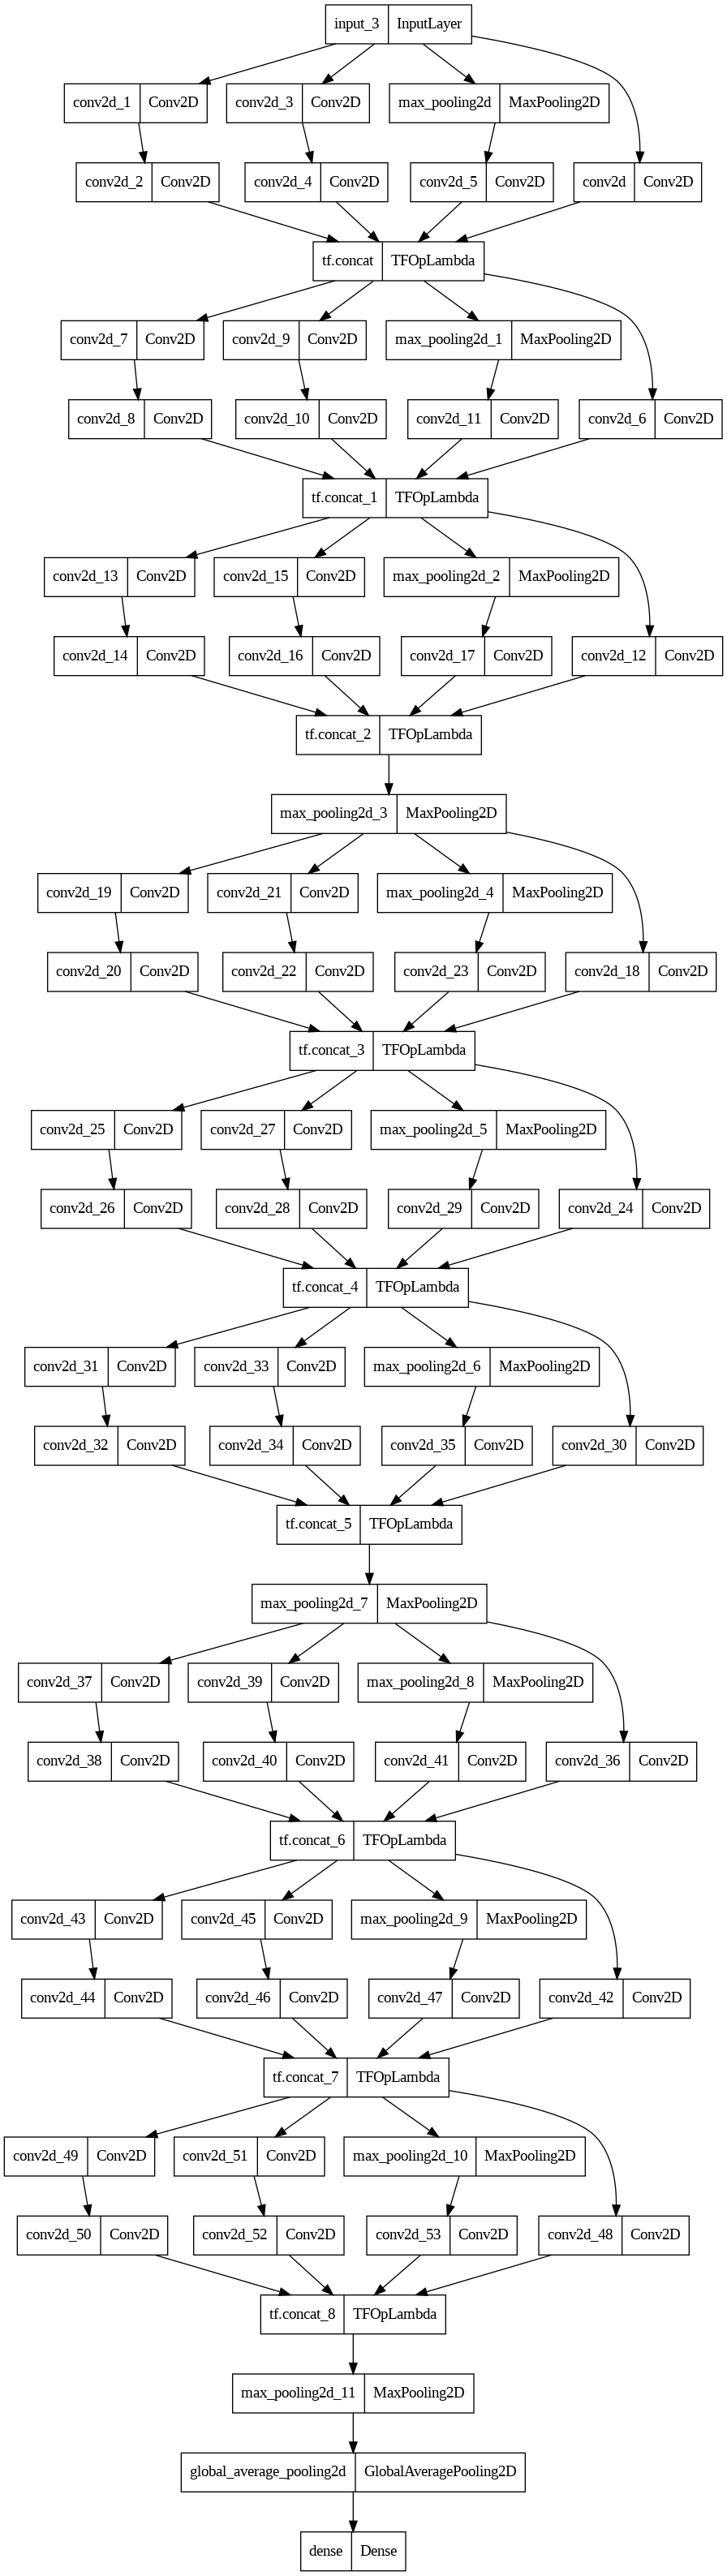

In [16]:
tf.keras.utils.plot_model(model)

In [17]:
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)
accuracy_metric = tf.metrics.SparseCategoricalAccuracy()
model.compile(optimizer=Adam(), loss=loss_fn, metrics=[accuracy_metric], jit_compile=True)

In [18]:
model.fit(train_data, batch_size=64, epochs=10, validation_data=(test_data))

Epoch 1/10
391/391 [==============================] - 435s 969ms/step - loss: 2.0298 - sparse_categorical_accuracy: 0.3319 - val_loss: 1.5175 - val_sparse_categorical_accuracy: 0.4432
Epoch 2/10
391/391 [==============================] - 340s 869ms/step - loss: 1.3430 - sparse_categorical_accuracy: 0.5114 - val_loss: 1.1930 - val_sparse_categorical_accuracy: 0.5806
Epoch 3/10
391/391 [==============================] - 340s 869ms/step - loss: 1.1007 - sparse_categorical_accuracy: 0.6067 - val_loss: 1.0895 - val_sparse_categorical_accuracy: 0.6074
Epoch 4/10
391/391 [==============================] - 340s 869ms/step - loss: 0.9143 - sparse_categorical_accuracy: 0.6770 - val_loss: 0.9125 - val_sparse_categorical_accuracy: 0.6764
Epoch 5/10
391/391 [==============================] - 340s 869ms/step - loss: 0.7713 - sparse_categorical_accuracy: 0.7283 - val_loss: 0.8783 - val_sparse_categorical_accuracy: 0.6963
Epoch 6/10
391/391 [==============================] - 340s 869ms/step - loss: 0.

Inception module on CIFAR-10 \\
batch size = 64 \\
filters = [32,64,128] \\
No. of inception blocks = 3

Training Accuracy - **90.52** \\
Test Accuracy - **72.5**

In [21]:
model.fit(train_data, batch_size=128, epochs=10, validation_data=(test_data))

Epoch 1/10
391/391 [==============================] - 340s 869ms/step - loss: 0.2159 - sparse_categorical_accuracy: 0.9243 - val_loss: 0.9836 - val_sparse_categorical_accuracy: 0.7501
Epoch 2/10
391/391 [==============================] - 341s 872ms/step - loss: 0.1796 - sparse_categorical_accuracy: 0.9374 - val_loss: 0.9594 - val_sparse_categorical_accuracy: 0.7550
Epoch 3/10
391/391 [==============================] - 339s 868ms/step - loss: 0.1613 - sparse_categorical_accuracy: 0.9442 - val_loss: 1.1781 - val_sparse_categorical_accuracy: 0.7488
Epoch 4/10
391/391 [==============================] - 339s 867ms/step - loss: 0.1303 - sparse_categorical_accuracy: 0.9558 - val_loss: 1.3296 - val_sparse_categorical_accuracy: 0.7325
Epoch 5/10
391/391 [==============================] - 341s 872ms/step - loss: 0.1178 - sparse_categorical_accuracy: 0.9602 - val_loss: 1.2294 - val_sparse_categorical_accuracy: 0.7462
Epoch 6/10
391/391 [==============================] - 339s 867ms/step - loss: 0.

Batch size changed

Inception module on CIFAR-10 \\
batch size = 128 \\
filters = [32,64,128] \\
No. of inception blocks = 3

Training Accuracy - **97.23** \\
Test Accuracy - **74.78**

# ResNet

In [9]:
def residual_block(x, n_filters):
  conv1 = Conv2D(n_filters, 3, activation=tf.nn.relu, padding="same")(x)
  conv2 = Conv2D(n_filters, 3, padding="same")(conv1)
  return tf.nn.relu(conv2 + x)

In [34]:
def resnet(input_shape, num_classes, num_blocks, filter):
    input = Input(shape=input_shape)
    x = Conv2D(filter, 3, padding="same")(input)
    # Add ResNet blocks
    for _ in range(num_blocks):
        x = residual_block(x, filter)

    #b1 = residual_block()

    pooled = GlobalAveragePooling2D()(x)
    output = Dense(num_classes)(pooled)

    model = Model(inputs=input, outputs=output)
    return model

In [7]:
input_shape = (32, 32, 3)  # CIFAR-10/100 image shape
num_classes = 10  # CIFAR-10 has 10 classes, CIFAR-100 has 100 classes
num_blocks = 3  # Number of ResNet blocks
filter = 32  # Number of filters in the first convolutional layer

In [14]:
model = resnet(input_shape, num_classes, num_blocks, filter)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_3 (Conv2D)           (None, 32, 32, 32)           896       ['input_3[0][0]']             
                                                                                                  
 conv2d_4 (Conv2D)           (None, 32, 32, 32)           9248      ['conv2d_3[0][0]']            
                                                                                                  
 conv2d_5 (Conv2D)           (None, 32, 32, 32)           9248      ['conv2d_4[0][0]']            
                                                                                              

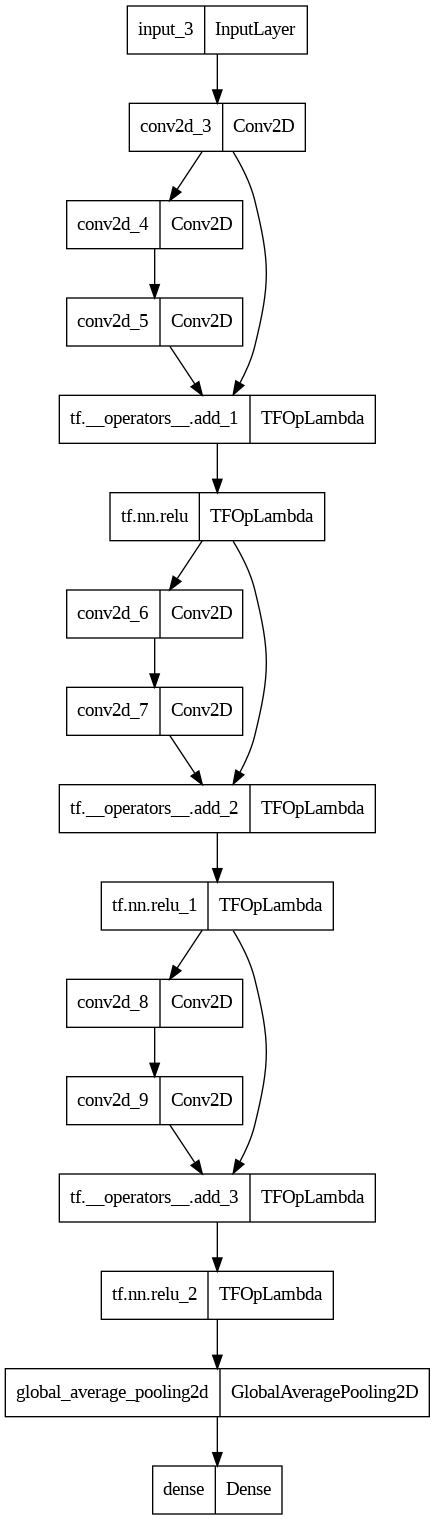

In [16]:
tf.keras.utils.plot_model(model)

In [17]:
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)
accuracy_metric = tf.metrics.SparseCategoricalAccuracy()
model.compile(optimizer=Adam(), loss=loss_fn, metrics=[accuracy_metric], jit_compile=True)

In [20]:
model.fit(train_data, batch_size=64, epochs=10, validation_data=(test_data))

Epoch 1/10
391/391 [==============================] - 24s 30ms/step - loss: 1.8632 - sparse_categorical_accuracy: 0.2864 - val_loss: 1.6579 - val_sparse_categorical_accuracy: 0.3743
Epoch 2/10
391/391 [==============================] - 8s 20ms/step - loss: 1.5522 - sparse_categorical_accuracy: 0.4233 - val_loss: 1.4343 - val_sparse_categorical_accuracy: 0.4729
Epoch 3/10
391/391 [==============================] - 8s 20ms/step - loss: 1.4156 - sparse_categorical_accuracy: 0.4824 - val_loss: 1.3568 - val_sparse_categorical_accuracy: 0.5025
Epoch 4/10
391/391 [==============================] - 8s 20ms/step - loss: 1.3152 - sparse_categorical_accuracy: 0.5218 - val_loss: 1.2970 - val_sparse_categorical_accuracy: 0.5205
Epoch 5/10
391/391 [==============================] - 8s 20ms/step - loss: 1.2214 - sparse_categorical_accuracy: 0.5567 - val_loss: 1.1970 - val_sparse_categorical_accuracy: 0.5643
Epoch 6/10
391/391 [==============================] - 8s 20ms/step - loss: 1.1553 - sparse_cat

Resnet blocks = 3 \\
batch size = 64 \\
filter = 32 \\

Training Accuracy - **64.44** \\
Test Accuracy - **64.39**

In [21]:
model = resnet(input_shape, num_classes, 5, filter)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_10 (Conv2D)          (None, 32, 32, 32)           896       ['input_4[0][0]']             
                                                                                                  
 conv2d_11 (Conv2D)          (None, 32, 32, 32)           9248      ['conv2d_10[0][0]']           
                                                                                                  
 conv2d_12 (Conv2D)          (None, 32, 32, 32)           9248      ['conv2d_11[0][0]']           
                                                                                            

In [22]:
model.compile(optimizer=Adam(), loss=loss_fn, metrics=[accuracy_metric], jit_compile=True)

In [23]:
model.fit(train_data, batch_size=64, epochs=10, validation_data=(test_data))

Epoch 1/10
391/391 [==============================] - 20s 39ms/step - loss: 1.8347 - sparse_categorical_accuracy: 0.3533 - val_loss: 1.6671 - val_sparse_categorical_accuracy: 0.3645
Epoch 2/10
391/391 [==============================] - 13s 32ms/step - loss: 1.5104 - sparse_categorical_accuracy: 0.4348 - val_loss: 1.3778 - val_sparse_categorical_accuracy: 0.4930
Epoch 3/10
391/391 [==============================] - 13s 33ms/step - loss: 1.3281 - sparse_categorical_accuracy: 0.5085 - val_loss: 1.3035 - val_sparse_categorical_accuracy: 0.5167
Epoch 4/10
391/391 [==============================] - 13s 33ms/step - loss: 1.2131 - sparse_categorical_accuracy: 0.5546 - val_loss: 1.1675 - val_sparse_categorical_accuracy: 0.5708
Epoch 5/10
391/391 [==============================] - 13s 34ms/step - loss: 1.1257 - sparse_categorical_accuracy: 0.5901 - val_loss: 1.0839 - val_sparse_categorical_accuracy: 0.5992
Epoch 6/10
391/391 [==============================] - 13s 34ms/step - loss: 1.0528 - spars

Resnet blocks =  \\
batch size = 64 \\
filter = 32 \\

Training Accuracy - **68.91** \\
Test Accuracy - **67.15**

In [27]:
model = resnet(input_shape, num_classes, 10, filter)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_32 (Conv2D)          (None, 32, 32, 32)           896       ['input_6[0][0]']             
                                                                                                  
 conv2d_33 (Conv2D)          (None, 32, 32, 32)           9248      ['conv2d_32[0][0]']           
                                                                                                  
 conv2d_34 (Conv2D)          (None, 32, 32, 32)           9248      ['conv2d_33[0][0]']           
                                                                                            

In [28]:
model.compile(optimizer=Adam(), loss=loss_fn, metrics=[accuracy_metric], jit_compile=True)

In [29]:
model.fit(train_data, batch_size=64, epochs=10, validation_data=(test_data))

Epoch 1/10
391/391 [==============================] - 36s 77ms/step - loss: 1.8419 - sparse_categorical_accuracy: 0.3605 - val_loss: 1.6364 - val_sparse_categorical_accuracy: 0.3836
Epoch 2/10
391/391 [==============================] - 26s 67ms/step - loss: 1.5295 - sparse_categorical_accuracy: 0.4312 - val_loss: 1.4107 - val_sparse_categorical_accuracy: 0.4831
Epoch 3/10
391/391 [==============================] - 26s 67ms/step - loss: 1.3245 - sparse_categorical_accuracy: 0.5122 - val_loss: 1.2883 - val_sparse_categorical_accuracy: 0.5290
Epoch 4/10
391/391 [==============================] - 27s 69ms/step - loss: 1.1882 - sparse_categorical_accuracy: 0.5683 - val_loss: 1.1420 - val_sparse_categorical_accuracy: 0.5823
Epoch 5/10
391/391 [==============================] - 26s 67ms/step - loss: 1.0973 - sparse_categorical_accuracy: 0.6038 - val_loss: 1.0771 - val_sparse_categorical_accuracy: 0.6224
Epoch 6/10
391/391 [==============================] - 27s 68ms/step - loss: 1.0219 - spars

Resnet blocks = 10 \\
batch size = 64 \\
filter = 32 \\

Training Accuracy - **70.74** \\
Test Accuracy - **68.99**

In [35]:
model = resnet(input_shape, num_classes, 10, 64)
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_56 (Conv2D)          (None, 32, 32, 64)           1792      ['input_8[0][0]']             
                                                                                                  
 conv2d_57 (Conv2D)          (None, 32, 32, 64)           36928     ['conv2d_56[0][0]']           
                                                                                                  
 conv2d_58 (Conv2D)          (None, 32, 32, 64)           36928     ['conv2d_57[0][0]']           
                                                                                            

In [36]:
model.compile(optimizer=Adam(), loss=loss_fn, metrics=[accuracy_metric], jit_compile=True)

In [37]:
model.fit(train_data, batch_size=64, epochs=10, validation_data=(test_data))

Epoch 1/10
391/391 [==============================] - 62s 140ms/step - loss: 1.9111 - sparse_categorical_accuracy: 0.2894 - val_loss: 1.5753 - val_sparse_categorical_accuracy: 0.4052
Epoch 2/10
391/391 [==============================] - 50s 129ms/step - loss: 1.4711 - sparse_categorical_accuracy: 0.4476 - val_loss: 1.3637 - val_sparse_categorical_accuracy: 0.4916
Epoch 3/10
391/391 [==============================] - 51s 131ms/step - loss: 1.2283 - sparse_categorical_accuracy: 0.5487 - val_loss: 1.1212 - val_sparse_categorical_accuracy: 0.5828
Epoch 4/10
391/391 [==============================] - 54s 138ms/step - loss: 1.0523 - sparse_categorical_accuracy: 0.6204 - val_loss: 1.0425 - val_sparse_categorical_accuracy: 0.6278
Epoch 5/10
391/391 [==============================] - 52s 133ms/step - loss: 0.9476 - sparse_categorical_accuracy: 0.6594 - val_loss: 0.9597 - val_sparse_categorical_accuracy: 0.6542
Epoch 6/10
391/391 [==============================] - 53s 134ms/step - loss: 0.8653 -

Resnet blocks = 10 \\
batch size = 64 \\
filter = 64 \\

Training Accuracy - **77.63** \\
Test Accuracy - **72.9**

In [38]:
model = resnet(input_shape, num_classes, 10, 128)
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_77 (Conv2D)          (None, 32, 32, 128)          3584      ['input_9[0][0]']             
                                                                                                  
 conv2d_78 (Conv2D)          (None, 32, 32, 128)          147584    ['conv2d_77[0][0]']           
                                                                                                  
 conv2d_79 (Conv2D)          (None, 32, 32, 128)          147584    ['conv2d_78[0][0]']           
                                                                                            

In [39]:
model.compile(optimizer=Adam(), loss=loss_fn, metrics=[accuracy_metric], jit_compile=True)

In [40]:
model.fit(train_data, batch_size=64, epochs=10, validation_data=(test_data))

Epoch 1/10
391/391 [==============================] - 147s 350ms/step - loss: 2.1957 - sparse_categorical_accuracy: 0.2568 - val_loss: 1.8574 - val_sparse_categorical_accuracy: 0.2957
Epoch 2/10
391/391 [==============================] - 128s 327ms/step - loss: 1.6115 - sparse_categorical_accuracy: 0.3898 - val_loss: 1.4392 - val_sparse_categorical_accuracy: 0.4524
Epoch 3/10
391/391 [==============================] - 134s 342ms/step - loss: 1.3365 - sparse_categorical_accuracy: 0.5049 - val_loss: 1.2419 - val_sparse_categorical_accuracy: 0.5391
Epoch 4/10
391/391 [==============================] - 135s 345ms/step - loss: 1.1420 - sparse_categorical_accuracy: 0.5861 - val_loss: 1.0650 - val_sparse_categorical_accuracy: 0.6141
Epoch 5/10
391/391 [==============================] - 137s 350ms/step - loss: 0.9843 - sparse_categorical_accuracy: 0.6484 - val_loss: 1.0427 - val_sparse_categorical_accuracy: 0.6316
Epoch 6/10
391/391 [==============================] - 135s 346ms/step - loss: 0.

Resnet blocks = 10 \\
batch size = 64 \\
filter = 128 \\

Training Accuracy - **79.27** \\
Test Accuracy - **74.42**